In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [90]:
def load_and_preprocess(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    plt.figure()
    plt.imshow(image)
    print(image.shape)
    image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    return image

(400, 600, 3)


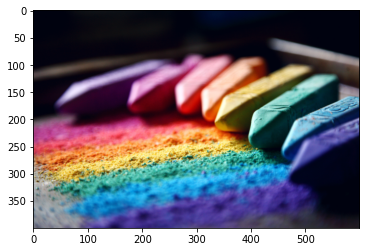

In [100]:
image_path = "../input/colors/colors.jpg"
image = load_and_preprocess(image_path)


# Define RGB to HEX converter

In [92]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## flatten image to fit inside KMeans Algorithm

In [101]:
def color_cluster(input_img, fig = False, number_of_colors = 8 ):
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(input_img)
    #count all labels in the model
    counts = Counter(labels)
    #extract the central color from each cluster
    center_colors = clf.cluster_centers_
    #make a list of all colors
    colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(colors[i]) for i in counts.keys()]
    if (fig):
        
        plt.figure()
        plt.imshow(image.reshape(400, 600, 3))
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

    return colors

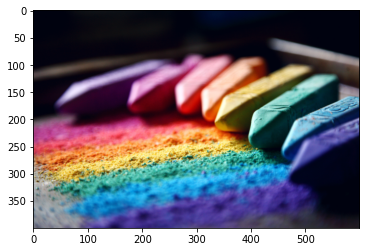

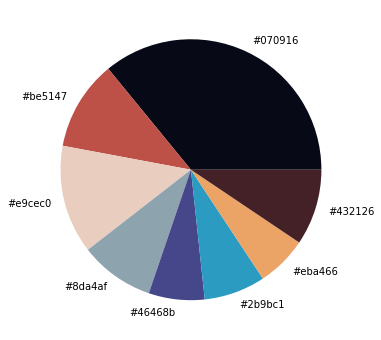

In [102]:
colors = color_cluster(input_img, True)

# Implimenting Searching using colors: Red, Green, Blue

In [95]:
# Matches if the color is present in the given image: 
def match(image, color, threshold = 60, number_of_colors = 10): 
    COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0], 
    'RED': [255, 0, 0]
    }
    color = COLORS[color]
    image_colors = color_cluster(image,  False, number_of_colors)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

# Load all images in memory

(400, 600, 3)
(400, 600, 3)
(400, 600, 3)
(400, 600, 3)


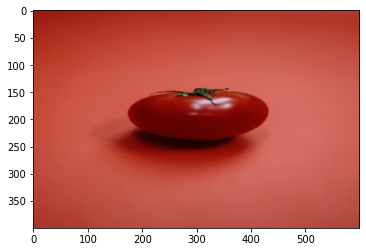

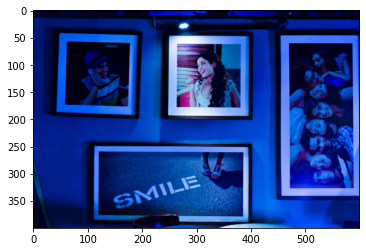

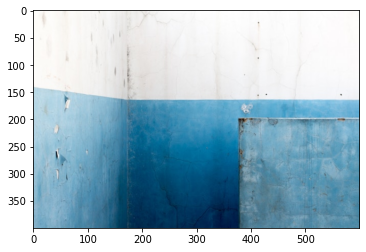

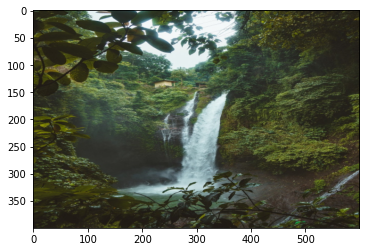

In [96]:
images = []

for i in range(4):
    path = "../input/searchimg/" +str(i+1)+".jpg"
    im = load_and_preprocess(path)
    images.append(im)


# Search 

(240000, 3)
(240000, 3)


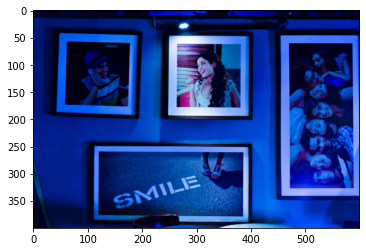

(240000, 3)
(240000, 3)


In [97]:
search_color = "BLUE"
outimages = []
for i in range(4):
    print(images[i].shape)
    flag = match(images[i], search_color, threshold = 40, number_of_colors = 10)
    if (flag):
        im = images[i].reshape(400, 600, 3)
        outimages.append(im)
        plt.figure()
        plt.imshow(im)
        plt.show()